## summary 
* **Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)....**                                                                                                       
* **Plot bar charts showing impact of employee salaries on retention...**                                                                          
* **Plot bar charts showing corelation between department and employee retention.....**                                                            
* **Now build logistic regression model using variables that were narrowed down in step 1....**                                                    
* **Measure the accuracy of the model........**    

## Importing required libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Reading dataset using pandas......

In [196]:
df = pd.read_csv("Downloads/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Checking For Missing & Null values......

In [197]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [198]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [199]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


## Rename columns for consistency.....

In [200]:
df.columns = [c.replace(" ", "_") for c in df.columns]

## left vs stayed.....

In [201]:
retention_rate = df['left'].value_counts(normalize=True)

print(" Overall Retention Rate (0 = stayed, 1 = left):")
print(retention_rate, "\n")

 Overall Retention Rate (0 = stayed, 1 = left):
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64 



## Plot bar charts showing impact of employee salaries on retention......
## Salary vs Retention

In [202]:
salary_ret = pd.crosstab(df["salary"], df["left"])
salary_ret

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


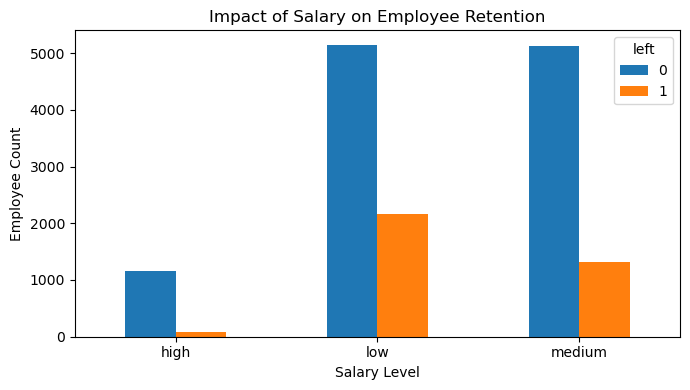

In [203]:
salary_ret = pd.crosstab(df["salary"], df["left"])

salary_ret.plot(kind="bar", figsize=(7,4))
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Employee Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Department vs Retention Bar Chart.......

In [204]:
dept_ret = pd.crosstab(df["Department"], df["left"])
print(dept_ret,)

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


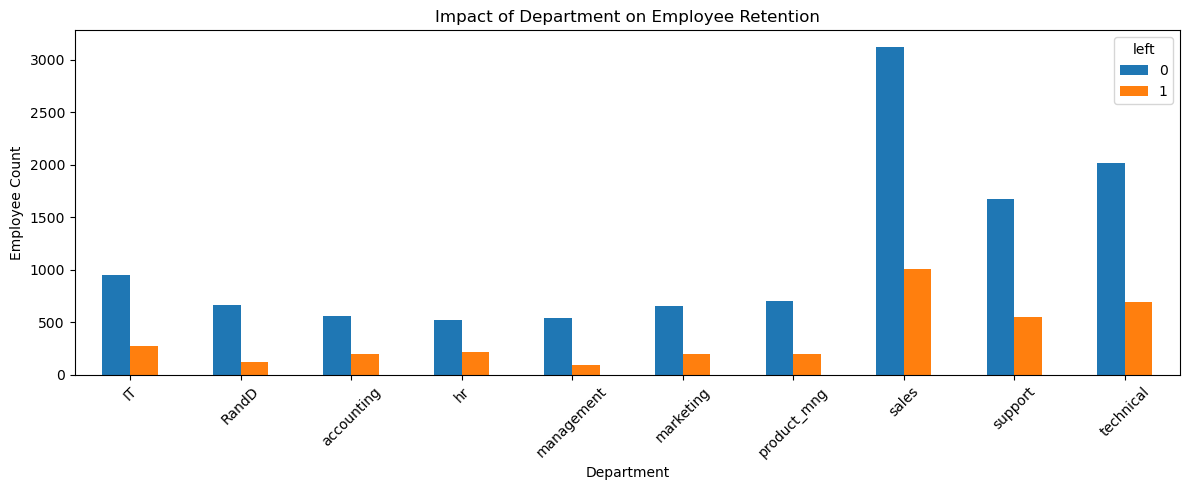

In [205]:
dept_ret.plot(kind="bar", figsize=(12,5))
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [206]:
# Simple preprocessing.....
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [207]:
features= ['satisfaction_level', 'time_spend_company', 'salary', 'number_project', 'Work_accident']

In [208]:
X = df[features]
y = df['left']

## TRAIN / TEST SPLIT......

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## LOGISTIC REGRESSION MODEL......

In [210]:
model = LogisticRegression(C=0.5, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=42)

## ACCURACY.....

In [211]:
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()

In [213]:
print(f"Accuracy: {accuracy:}")

Accuracy: 0.8015555555555556
